In [15]:
import visualization as vis
import nn
import dataset as dt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import clear_output
from ipywidgets import interact, interactive, interact_manual

from nn import NNet
from optimizers import Optimizer




## Generated figures example

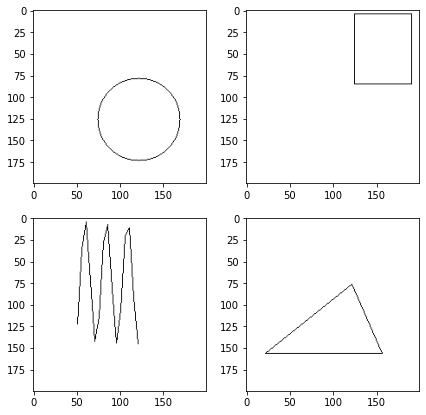

In [4]:
%matplotlib inline

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(vis.visualize_figure(dt.create_random_circle()),cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(vis.visualize_figure(dt.create_random_rectangle()), cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(vis.visualize_figure(dt.create_random_sine()),cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(vis.visualize_figure(dt.create_random_triangle()),cmap='gray')
                

## Control panel

In [47]:
num_classes_widget = widgets.BoundedIntText(value=2, min=2, max=4, step=1, description='num classes:')
num_epochs_widget = widgets.BoundedIntText(value=5, min=1, max=20, step=1, description='num epochs:')
learning_rate_widget = widgets.Dropdown(options=[1e-4, 1e-3, 1e-2], value=1e-3, description='learning rate:')
samples_per_class_widget = widgets.BoundedIntText(value=1000, min=750, max=5000, step=250, description="per class:")
train_btn = widgets.Button(description='Train', button_style='')
create_btn = widgets.Button(description='Recreate', button_style='')   
test_btn = widgets.Button(description='Test', button_style='')
test_dataset_btn = widgets.Button(description='Test', button_style='')
problem_type = widgets.Dropdown(description="problem type", options=["multi-label", "multi-class"], value="multi-label")
optimizer_type = widgets.Dropdown(description="optimizer", options=["sgd", "momentum", "adam"], value="adam")

model = NNet()

def recreate_model(b):
    global model
    if problem_type.value == "multi-label":
        loss = 'mse'
    else:
        loss = "softmax"
    model = NNet(hidden_dims=[layer.value for layer in architecture], 
                 num_cls=num_classes_widget.value, loss=loss)
    print("Create model finished!")
    

def train_model(b):
    optimizer = Optimizer(optim_type=optimizer_type.value)
    samples_per_class = samples_per_class_widget.value
    X_train, y_train = dt.create_dataset(num_classes_widget.value, int(samples_per_class*0.9))
    X_val, y_val = dt.create_dataset(num_classes_widget.value, int(samples_per_class*0.1))
    model.train(X_train, y_train, X_val, y_val, optimizer, num_epochs=num_epochs_widget.value)
    print("Training finished!")
    
def test_model(b):
    #clear_output(wait=True)
    display(test_btn)
    generate_funcs = [dt.create_random_rectangle, dt.create_random_triangle,
                      dt.create_random_circle, dt.create_random_sine]
    figure_num = np.random.choice(1000) % num_classes_widget.value
    figure = generate_funcs[figure_num]()
    horizontal = np.sum(figure, axis=1)
    vertical = np.sum(figure, axis=0)
    fig_vec = np.append(horizontal, vertical)
    prediction = model.predict(fig_vec)
    label = np.argmax(prediction)
    plt.imshow(vis.visualize_figure(figure),cmap='gray')
    print(dt.label2class(label))
    all_classes = ["rectangle", "triangle", "circle", "sine"]
    for i in range(num_classes_widget.value):
        print("Prediction for %s: %.5f" % (all_classes[i], prediction[i]))
        
def test_accuracy(b):
    X_test, y_test = dt.create_dataset(num_classes_widget.value, 500)
    predictions = model.predict(X_test)
    labels = np.argmax(predictions, axis=1)
    print(np.mean(y_test == labels))
    
    
create_btn.on_click(recreate_model)
train_btn.on_click(train_model)
test_btn.on_click(test_model)
test_dataset_btn.on_click(test_accuracy)
    
    

In [48]:
architecture = []
@interact(HiddenLayers=(1, 3, 1))
def architecture_ui(HiddenLayers=1):
    global architecture
    architecture = []
    for i in range(HiddenLayers):
        architecture.append(widgets.BoundedIntText(value=100, min=10, max=1000, step=10, description='hidden %d' % (i + 1)))
    ui = widgets.HBox(architecture)
    display(ui)
                             
inputs_ui = widgets.VBox([num_classes_widget, num_epochs_widget, learning_rate_widget])
ui = widgets.HBox([inputs_ui, widgets.VBox([samples_per_class_widget, widgets.HBox([problem_type, optimizer_type]),
                                            widgets.HBox([create_btn, train_btn, test_btn, test_dataset_btn])])])
                   
display(ui)

interactive(children=(IntSlider(value=1, description='HiddenLayers', max=3, min=1), Output()), _dom_classes=('…

Create model finished!


  5%|██▌                                                | 1/20 [00:00<00:03,  5.18it/s]


Training loss after 1 epoch: 0.1308
Validation loss after 1 epoch: 0.1308
Training accuracy after 1 epoch: 0.5750
Validation accuracy after 1 epoch: 0.5150

Training loss after 2 epoch: 0.0845


 10%|█████                                              | 2/20 [00:00<00:03,  4.78it/s]

Validation loss after 2 epoch: 0.0845
Training accuracy after 2 epoch: 0.7979
Validation accuracy after 2 epoch: 0.7400

Training loss after 3 epoch: 0.0622


 15%|███████▋                                           | 3/20 [00:00<00:03,  4.53it/s]

Validation loss after 3 epoch: 0.0622
Training accuracy after 3 epoch: 0.8719
Validation accuracy after 3 epoch: 0.8183


 20%|██████████▏                                        | 4/20 [00:00<00:03,  4.46it/s]


Training loss after 4 epoch: 0.0478
Validation loss after 4 epoch: 0.0478
Training accuracy after 4 epoch: 0.9132
Validation accuracy after 4 epoch: 0.8642


 25%|████████████▊                                      | 5/20 [00:01<00:03,  4.36it/s]


Training loss after 5 epoch: 0.0389
Validation loss after 5 epoch: 0.0389
Training accuracy after 5 epoch: 0.9387
Validation accuracy after 5 epoch: 0.8858

Training loss after 6 epoch: 0.0300


 30%|███████████████▎                                   | 6/20 [00:01<00:03,  4.50it/s]

Validation loss after 6 epoch: 0.0300
Training accuracy after 6 epoch: 0.9559
Validation accuracy after 6 epoch: 0.9058


 35%|█████████████████▊                                 | 7/20 [00:01<00:02,  4.44it/s]


Training loss after 7 epoch: 0.0345
Validation loss after 7 epoch: 0.0345
Training accuracy after 7 epoch: 0.9629
Validation accuracy after 7 epoch: 0.9133


 40%|████████████████████▍                              | 8/20 [00:01<00:02,  4.41it/s]


Training loss after 8 epoch: 0.0215
Validation loss after 8 epoch: 0.0215
Training accuracy after 8 epoch: 0.9711
Validation accuracy after 8 epoch: 0.9200


 45%|██████████████████████▉                            | 9/20 [00:01<00:02,  4.50it/s]


Training loss after 9 epoch: 0.0187
Validation loss after 9 epoch: 0.0187
Training accuracy after 9 epoch: 0.9775
Validation accuracy after 9 epoch: 0.9217


 50%|█████████████████████████                         | 10/20 [00:02<00:02,  4.55it/s]


Training loss after 10 epoch: 0.0162
Validation loss after 10 epoch: 0.0162
Training accuracy after 10 epoch: 0.9811
Validation accuracy after 10 epoch: 0.9250


 55%|███████████████████████████▌                      | 11/20 [00:02<00:01,  4.67it/s]


Training loss after 11 epoch: 0.0145
Validation loss after 11 epoch: 0.0145
Training accuracy after 11 epoch: 0.9839
Validation accuracy after 11 epoch: 0.9292


 60%|██████████████████████████████                    | 12/20 [00:02<00:01,  4.58it/s]


Training loss after 12 epoch: 0.0114
Validation loss after 12 epoch: 0.0114
Training accuracy after 12 epoch: 0.9875
Validation accuracy after 12 epoch: 0.9275

Training loss after 13 epoch: 0.0136
Validation loss after 13 epoch: 0.0136


 65%|████████████████████████████████▌                 | 13/20 [00:02<00:01,  4.90it/s]

Training accuracy after 13 epoch: 0.9892
Validation accuracy after 13 epoch: 0.9325

Training loss after 14 epoch: 0.0107


 70%|███████████████████████████████████               | 14/20 [00:03<00:01,  4.75it/s]

Validation loss after 14 epoch: 0.0107
Training accuracy after 14 epoch: 0.9904
Validation accuracy after 14 epoch: 0.9317

Training loss after 15 epoch: 0.0100


 75%|█████████████████████████████████████▌            | 15/20 [00:03<00:01,  4.62it/s]

Validation loss after 15 epoch: 0.0100
Training accuracy after 15 epoch: 0.9903
Validation accuracy after 15 epoch: 0.9317


 80%|████████████████████████████████████████          | 16/20 [00:03<00:00,  4.50it/s]


Training loss after 16 epoch: 0.0087
Validation loss after 16 epoch: 0.0087
Training accuracy after 16 epoch: 0.9925
Validation accuracy after 16 epoch: 0.9350


 85%|██████████████████████████████████████████▌       | 17/20 [00:03<00:00,  4.47it/s]


Training loss after 17 epoch: 0.0095
Validation loss after 17 epoch: 0.0095
Training accuracy after 17 epoch: 0.9911
Validation accuracy after 17 epoch: 0.9358

Training loss after 18 epoch: 0.0070


 90%|█████████████████████████████████████████████     | 18/20 [00:03<00:00,  4.61it/s]

Validation loss after 18 epoch: 0.0070
Training accuracy after 18 epoch: 0.9938
Validation accuracy after 18 epoch: 0.9333

Training loss after 19 epoch: 0.0056


 95%|███████████████████████████████████████████████▌  | 19/20 [00:04<00:00,  4.62it/s]

Validation loss after 19 epoch: 0.0056
Training accuracy after 19 epoch: 0.9943
Validation accuracy after 19 epoch: 0.9333


100%|██████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.59it/s]


Training loss after 20 epoch: 0.0092
Validation loss after 20 epoch: 0.0092
Training accuracy after 20 epoch: 0.9912
Validation accuracy after 20 epoch: 0.9242
Training finished!



  5%|██▌                                                | 1/20 [00:00<00:03,  5.41it/s]


Training loss after 1 epoch: 0.0373
Validation loss after 1 epoch: 0.0373
Training accuracy after 1 epoch: 0.9594
Validation accuracy after 1 epoch: 0.9550


 10%|█████                                              | 2/20 [00:00<00:03,  4.73it/s]


Training loss after 2 epoch: 0.0230
Validation loss after 2 epoch: 0.0230
Training accuracy after 2 epoch: 0.9669
Validation accuracy after 2 epoch: 0.9633

Training loss after 3 epoch: 0.0182


 15%|███████▋                                           | 3/20 [00:00<00:03,  4.77it/s]

Validation loss after 3 epoch: 0.0182
Training accuracy after 3 epoch: 0.9758
Validation accuracy after 3 epoch: 0.9633


 20%|██████████▏                                        | 4/20 [00:00<00:03,  4.56it/s]


Training loss after 4 epoch: 0.0126
Validation loss after 4 epoch: 0.0126
Training accuracy after 4 epoch: 0.9773
Validation accuracy after 4 epoch: 0.9600


 25%|████████████▊                                      | 5/20 [00:01<00:03,  4.56it/s]


Training loss after 5 epoch: 0.0088
Validation loss after 5 epoch: 0.0088
Training accuracy after 5 epoch: 0.9810
Validation accuracy after 5 epoch: 0.9583


 30%|███████████████▎                                   | 6/20 [00:01<00:03,  4.53it/s]


Training loss after 6 epoch: 0.0123
Validation loss after 6 epoch: 0.0123
Training accuracy after 6 epoch: 0.9829
Validation accuracy after 6 epoch: 0.9583

Training loss after 7 epoch: 0.0085


 35%|█████████████████▊                                 | 7/20 [00:01<00:02,  4.59it/s]

Validation loss after 7 epoch: 0.0085
Training accuracy after 7 epoch: 0.9833
Validation accuracy after 7 epoch: 0.9575

Training loss after 8 epoch: 0.0082


 40%|████████████████████▍                              | 8/20 [00:01<00:02,  4.69it/s]

Validation loss after 8 epoch: 0.0082
Training accuracy after 8 epoch: 0.9854
Validation accuracy after 8 epoch: 0.9583


 45%|██████████████████████▉                            | 9/20 [00:01<00:02,  4.71it/s]


Training loss after 9 epoch: 0.0078
Validation loss after 9 epoch: 0.0078
Training accuracy after 9 epoch: 0.9863
Validation accuracy after 9 epoch: 0.9592


 50%|█████████████████████████                         | 10/20 [00:02<00:02,  4.60it/s]


Training loss after 10 epoch: 0.0084
Validation loss after 10 epoch: 0.0084
Training accuracy after 10 epoch: 0.9871
Validation accuracy after 10 epoch: 0.9600


 55%|███████████████████████████▌                      | 11/20 [00:02<00:01,  4.51it/s]


Training loss after 11 epoch: 0.0106
Validation loss after 11 epoch: 0.0106
Training accuracy after 11 epoch: 0.9878
Validation accuracy after 11 epoch: 0.9575


 60%|██████████████████████████████                    | 12/20 [00:02<00:01,  4.59it/s]


Training loss after 12 epoch: 0.0143
Validation loss after 12 epoch: 0.0143
Training accuracy after 12 epoch: 0.9878
Validation accuracy after 12 epoch: 0.9558


 65%|████████████████████████████████▌                 | 13/20 [00:02<00:01,  4.51it/s]


Training loss after 13 epoch: 0.0096
Validation loss after 13 epoch: 0.0096
Training accuracy after 13 epoch: 0.9876
Validation accuracy after 13 epoch: 0.9567


 70%|███████████████████████████████████               | 14/20 [00:03<00:01,  4.42it/s]


Training loss after 14 epoch: 0.0073
Validation loss after 14 epoch: 0.0073
Training accuracy after 14 epoch: 0.9881
Validation accuracy after 14 epoch: 0.9575


 75%|█████████████████████████████████████▌            | 15/20 [00:03<00:01,  4.47it/s]


Training loss after 15 epoch: 0.0101
Validation loss after 15 epoch: 0.0101
Training accuracy after 15 epoch: 0.9884
Validation accuracy after 15 epoch: 0.9575


 80%|████████████████████████████████████████          | 16/20 [00:03<00:00,  4.49it/s]


Training loss after 16 epoch: 0.0077
Validation loss after 16 epoch: 0.0077
Training accuracy after 16 epoch: 0.9890
Validation accuracy after 16 epoch: 0.9558


 85%|██████████████████████████████████████████▌       | 17/20 [00:03<00:00,  4.47it/s]


Training loss after 17 epoch: 0.0074
Validation loss after 17 epoch: 0.0074
Training accuracy after 17 epoch: 0.9895
Validation accuracy after 17 epoch: 0.9583

Training loss after 18 epoch: 0.0145


 90%|█████████████████████████████████████████████     | 18/20 [00:03<00:00,  4.52it/s]

Validation loss after 18 epoch: 0.0145
Training accuracy after 18 epoch: 0.9875
Validation accuracy after 18 epoch: 0.9525


 95%|███████████████████████████████████████████████▌  | 19/20 [00:04<00:00,  4.47it/s]


Training loss after 19 epoch: 0.0095
Validation loss after 19 epoch: 0.0095
Training accuracy after 19 epoch: 0.9875
Validation accuracy after 19 epoch: 0.9508


100%|██████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.53it/s]


Training loss after 20 epoch: 0.0070
Validation loss after 20 epoch: 0.0070
Training accuracy after 20 epoch: 0.9888
Validation accuracy after 20 epoch: 0.9500
Training finished!



  5%|██▌                                                | 1/20 [00:00<00:04,  4.58it/s]


Training loss after 1 epoch: 0.0192
Validation loss after 1 epoch: 0.0192
Training accuracy after 1 epoch: 0.9728
Validation accuracy after 1 epoch: 0.9633


 10%|█████                                              | 2/20 [00:00<00:03,  4.54it/s]


Training loss after 2 epoch: 0.0124
Validation loss after 2 epoch: 0.0124
Training accuracy after 2 epoch: 0.9787
Validation accuracy after 2 epoch: 0.9617


 15%|███████▋                                           | 3/20 [00:00<00:03,  4.54it/s]


Training loss after 3 epoch: 0.0122
Validation loss after 3 epoch: 0.0122
Training accuracy after 3 epoch: 0.9819
Validation accuracy after 3 epoch: 0.9667


 20%|██████████▏                                        | 4/20 [00:00<00:03,  4.60it/s]


Training loss after 4 epoch: 0.0100
Validation loss after 4 epoch: 0.0100
Training accuracy after 4 epoch: 0.9842
Validation accuracy after 4 epoch: 0.9675


 25%|████████████▊                                      | 5/20 [00:01<00:03,  4.61it/s]


Training loss after 5 epoch: 0.0094
Validation loss after 5 epoch: 0.0094
Training accuracy after 5 epoch: 0.9850
Validation accuracy after 5 epoch: 0.9667


 30%|███████████████▎                                   | 6/20 [00:01<00:03,  3.67it/s]


Training loss after 6 epoch: 0.0086
Validation loss after 6 epoch: 0.0086
Training accuracy after 6 epoch: 0.9849
Validation accuracy after 6 epoch: 0.9683


 35%|█████████████████▊                                 | 7/20 [00:01<00:04,  3.03it/s]


Training loss after 7 epoch: 0.0078
Validation loss after 7 epoch: 0.0078
Training accuracy after 7 epoch: 0.9862
Validation accuracy after 7 epoch: 0.9692


 40%|████████████████████▍                              | 8/20 [00:02<00:04,  2.78it/s]


Training loss after 8 epoch: 0.0066
Validation loss after 8 epoch: 0.0066
Training accuracy after 8 epoch: 0.9870
Validation accuracy after 8 epoch: 0.9650


 45%|██████████████████████▉                            | 9/20 [00:02<00:04,  2.57it/s]


Training loss after 9 epoch: 0.0058
Validation loss after 9 epoch: 0.0058
Training accuracy after 9 epoch: 0.9874
Validation accuracy after 9 epoch: 0.9658


 50%|█████████████████████████                         | 10/20 [00:03<00:04,  2.50it/s]


Training loss after 10 epoch: 0.0061
Validation loss after 10 epoch: 0.0061
Training accuracy after 10 epoch: 0.9883
Validation accuracy after 10 epoch: 0.9675


 55%|███████████████████████████▌                      | 11/20 [00:03<00:03,  2.38it/s]


Training loss after 11 epoch: 0.0068
Validation loss after 11 epoch: 0.0068
Training accuracy after 11 epoch: 0.9887
Validation accuracy after 11 epoch: 0.9642


 60%|██████████████████████████████                    | 12/20 [00:04<00:03,  2.38it/s]


Training loss after 12 epoch: 0.0064
Validation loss after 12 epoch: 0.0064
Training accuracy after 12 epoch: 0.9891
Validation accuracy after 12 epoch: 0.9667


 65%|████████████████████████████████▌                 | 13/20 [00:04<00:02,  2.75it/s]


Training loss after 13 epoch: 0.0057
Validation loss after 13 epoch: 0.0057
Training accuracy after 13 epoch: 0.9901
Validation accuracy after 13 epoch: 0.9700

Training loss after 14 epoch: 0.0056


 70%|███████████████████████████████████               | 14/20 [00:04<00:01,  3.14it/s]

Validation loss after 14 epoch: 0.0056
Training accuracy after 14 epoch: 0.9905
Validation accuracy after 14 epoch: 0.9675

Training loss after 15 epoch: 0.0061


 75%|█████████████████████████████████████▌            | 15/20 [00:04<00:01,  3.48it/s]

Validation loss after 15 epoch: 0.0061
Training accuracy after 15 epoch: 0.9897
Validation accuracy after 15 epoch: 0.9650

Training loss after 16 epoch: 0.0057


 80%|████████████████████████████████████████          | 16/20 [00:04<00:01,  3.83it/s]

Validation loss after 16 epoch: 0.0057
Training accuracy after 16 epoch: 0.9902
Validation accuracy after 16 epoch: 0.9708


 85%|██████████████████████████████████████████▌       | 17/20 [00:05<00:00,  4.00it/s]


Training loss after 17 epoch: 0.0071
Validation loss after 17 epoch: 0.0071
Training accuracy after 17 epoch: 0.9907
Validation accuracy after 17 epoch: 0.9683


 90%|█████████████████████████████████████████████     | 18/20 [00:05<00:00,  4.15it/s]


Training loss after 18 epoch: 0.0056
Validation loss after 18 epoch: 0.0056
Training accuracy after 18 epoch: 0.9907
Validation accuracy after 18 epoch: 0.9667


 95%|███████████████████████████████████████████████▌  | 19/20 [00:05<00:00,  4.29it/s]


Training loss after 19 epoch: 0.0056
Validation loss after 19 epoch: 0.0056
Training accuracy after 19 epoch: 0.9909
Validation accuracy after 19 epoch: 0.9633


100%|██████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.42it/s]


Training loss after 20 epoch: 0.0065
Validation loss after 20 epoch: 0.0065
Training accuracy after 20 epoch: 0.9915
Validation accuracy after 20 epoch: 0.9658
Training finished!


In [57]:
X_test, y_test = dt.create_dataset(num_classes_widget.value, 500)
predictions = model.predict(X_test)
labels = np.argmax(predictions, axis=1)
print(np.mean(y_test == labels))

100%|██████████████████████████████████████████████| 500/500 [00:00<00:00, 8945.14it/s]

0.962


## Test